# Attendance Table Exporation

This notebook will look at the table structure, and provide simple visualization of attendance.


In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

## Load the Data into DataFrames
Use the Pandas' DataFrame to store the data into a frame.  This will be used to do simple analysis.

In [2]:
attendance_df = pd.read_csv(r'data/DIM_ATTENDANCE.csv',
                            index_col=None,
                            infer_datetime_format=True)

The CSV contains the following columns:

In [3]:
attendance_df.shape

(113, 12)

In [4]:
attendance_df.columns

Index(['EventID', 'Location', 'SiteID', 'POS_SystemID', 'businessDate',
       'TotalAttendance', 'ConcessionAttendance', 'SuiteAttendance',
       'TotalNumSuites', 'SuitesInUse', 'ClubAttendance',
       'MerchandiseAttendance'],
      dtype='object')

The column names by themselves do not show much, but it does show that we have some possible good information to link to the other tables:

- SiteID
- businessData
- TotalAttendance
- ConcessionAttendance
- MerchandiseAttendance

In [5]:
attendance_df.head()

,EventID,Location,SiteID,POS_SystemID,businessDate,TotalAttendance,ConcessionAttendance,SuiteAttendance,TotalNumSuites,SuitesInUse,ClubAttendance,MerchandiseAttendance
0,14895690,Site2,6,93,3/30/2017,0,0,0,0,0,0,0
1,14981354,Site2,6,93,4/7/2017,41586,36872,1091,70,66,2468,41586
2,14995359,Site2,6,93,4/8/2017,33731,29966,876,70,49,1833,33731
3,14999428,Site2,6,93,4/9/2017,33727,30281,745,68,48,1617,33727
4,15004567,Site2,6,93,4/10/2017,30244,27128,763,68,48,1172,30244


Next let's describe the dataset and see if anything stands by describing the dataset.
In addition, since there are 2 sites being examined and they are not 1:1 in design and size, let's break them apart. 

In [6]:
attendance_df[attendance_df['Location'] == 'Site1'].describe()

,EventID,SiteID,POS_SystemID,TotalAttendance,ConcessionAttendance,SuiteAttendance,TotalNumSuites,SuitesInUse,ClubAttendance,MerchandiseAttendance
count,3.000000e+01,30.0,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.449762e+07,15.0,16.0,40196.933333,33779.866667,1986.200000,172.166667,105.000000,4430.866667,40196.933333
std,1.135903e+06,0.0,0.0,21518.376158,17793.743493,1009.693788,2.520035,56.871301,3020.068802,21518.376158
min,1.319686e+07,15.0,16.0,8272.000000,6108.000000,720.000000,170.000000,23.000000,0.000000,8272.000000
25%,1.368441e+07,15.0,16.0,17701.750000,14885.250000,925.000000,170.000000,53.750000,1310.750000,17701.750000
50%,1.400405e+07,15.0,16.0,45124.500000,37133.000000,2145.500000,170.000000,89.500000,5338.500000,45124.500000
75%,1.575411e+07,15.0,16.0,61538.000000,51083.250000,3074.750000,175.000000,168.750000,7376.000000,61538.000000
max,1.647954e+07,15.0,16.0,67002.000000,55536.000000,3339.000000,175.000000,175.000000,8142.000000,67002.000000


In [7]:
attendance_df[attendance_df['Location'] == 'Site2'].describe()

,EventID,SiteID,POS_SystemID,TotalAttendance,ConcessionAttendance,SuiteAttendance,TotalNumSuites,SuitesInUse,ClubAttendance,MerchandiseAttendance
count,8.300000e+01,83.0,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,1.575190e+07,6.0,93.0,19241.879518,16059.891566,846.650602,67.301205,54.216867,1423.650602,19241.879518
std,4.777579e+05,0.0,0.0,8071.583848,7501.156672,185.011498,7.492655,8.392866,607.358383,8071.583848
min,1.489569e+07,6.0,93.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.534982e+07,6.0,93.0,14147.000000,10904.000000,798.500000,68.000000,50.000000,1131.000000,14147.000000
50%,1.575782e+07,6.0,93.0,18515.000000,15019.000000,866.000000,68.000000,55.000000,1333.000000,18515.000000
75%,1.616671e+07,6.0,93.0,25054.500000,21446.500000,940.500000,68.000000,58.000000,1661.000000,25054.500000
max,1.651861e+07,6.0,93.0,41586.000000,36872.000000,1129.000000,70.000000,66.000000,4945.000000,41586.000000


From the describe, we can see that Site1 has more sales potential verse Site2.  This means that Site1 should have more sales information when compared to Site2.  

In addition the following population/seating arrangements differ:

- Number of Suites and population
- Attendance in Club
- Attendance

This leads to the fact that we will need to **normalization** our figures by using z-scores or some other meteric when comparing Site1 to Site2.

## Data Visualization

Below are basic graph information about the two site.

### Operational Days

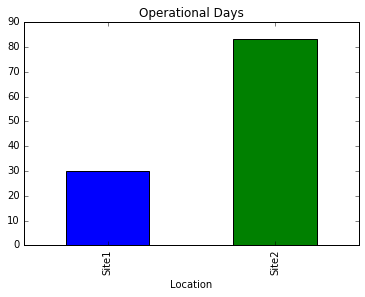

In [8]:
attendance_df.groupby('Location').businessDate.count().plot('bar', title='Operational Days')

### Average Daily Operating Attendance

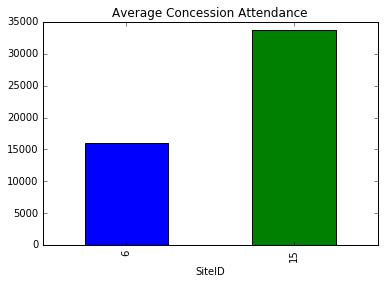

In [9]:
(attendance_df.groupby('SiteID')['ConcessionAttendance'].sum()/attendance_df.groupby('SiteID').businessDate.count()
).plot('bar',
       title="Average Concession Attendance")

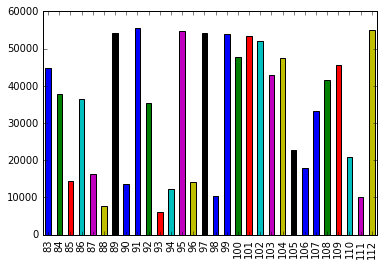

In [10]:
attendance_df.loc[attendance_df['Location'] == 'Site1', 'ConcessionAttendance'].plot('bar')

Let's look at each site's attendance percentages by dates.

1. Calculate % present by takeing the (Current Attendance / Max Attendance) * 100
2. Graph out each site

In [11]:
def calendar_array(dates, data):
    i, j = zip(*[d.isocalendar()[1:] for d in dates])
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1

    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar

In [12]:
def calendar_heatmap(ax, dates, data):
    i, j, calendar = calendar_array(dates, data)
    im = ax.imshow(calendar, interpolation='none', cmap='summer')
    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)
    ax.figure.colorbar(im)

In [13]:
def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]

    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, int(day), ha='center', va='center')

    ax.set(xticks=np.arange(7), 
           xticklabels=['M', 'T', 'W', 'Th', 'F', 'S', 'Su'])
    ax.xaxis.tick_top()

In [14]:
def label_months(ax, dates, i, j, calendar):
    month_labels = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                             'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    months = np.array([d.month for d in dates])
    uniq_months = sorted(set(months))
    yticks = [i[months == m].mean() for m in uniq_months]
    labels = [month_labels[m - 1] for m in uniq_months]
    ax.set(yticks=yticks)
    ax.set_yticklabels(labels, rotation=90)

In [15]:
site1 = attendance_df['Location'] == 'Site1'
site2 = attendance_df['Location'] == 'Site2'

In [16]:
site1_df = attendance_df[site1]
site2_df = attendance_df[site2]

In [17]:
dates_site1 = [dt.datetime.strptime(d, "%m/%d/%Y") for d in site1_df['businessDate'].tolist()]
dates_site2 = [dt.datetime.strptime(d, "%m/%d/%Y") for d in site2_df['businessDate'].tolist()]

In [18]:
data_site1 = (site1_df['TotalAttendance'] / site1_df['TotalAttendance'].max()) * 100
data_site2 = (site2_df['TotalAttendance'] / site2_df['TotalAttendance'].max()) * 100

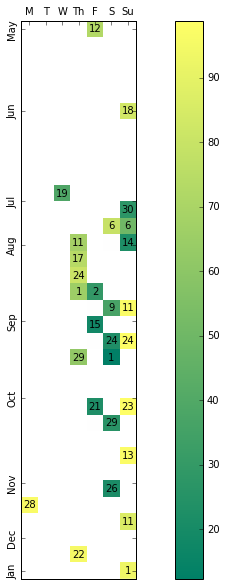

In [19]:
fig, ax = plt.subplots(figsize=(14, 10))
calendar_heatmap(ax, dates_site1, data_site1)
plt.show()

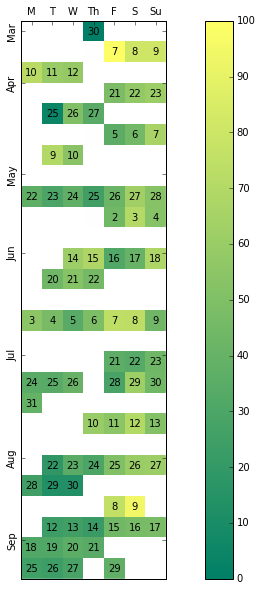

In [20]:
fig, ax = plt.subplots(figsize=(14, 10))
calendar_heatmap(ax, dates_site2, data_site2)
plt.show()